In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [2]:
diab = pd.read_csv('C:/Users/deepak/Desktop/ML datasets/Datasets/Diabetes_Prediction/diabetes.csv')
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# check if there are any null values in the data
diab.isnull().values.sum()

0

In [4]:
#0 in diab.Age
print(diab.filter(like = '0', axis = 0))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
10             4      110             92              0        0  37.6   
20             3      126             88             41      235  39.3   
30             5      109             75             26        0  36.0   
40             3      180             64             25       70  34.0   
..           ...      ...            ...            ...      ...   ...   
720            4       83             86             19        0  29.3   
730            3      130             78             23       79  28.4   
740           11      120             80             37      150  42.3   
750            4      136             70              0        0  31.2   
760            2       88             58             26       16  28.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
10                 

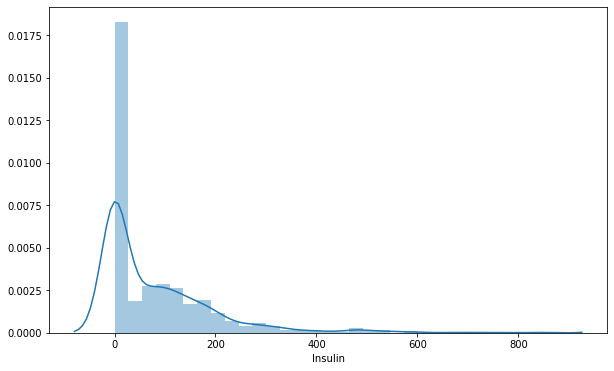

In [5]:
# as 0's are present in "Insulin","Glucose","SkinThickness","BMI","DiabetesPedigreeFunction","Age"
    # so replace the 0 values with mean/median
fig, ax = plt.subplots(figsize = (10,6))
sns.distplot(diab.Insulin)
# as the data is right skewed, so we cannot use mean to replace the "0" values, we can use median/mode

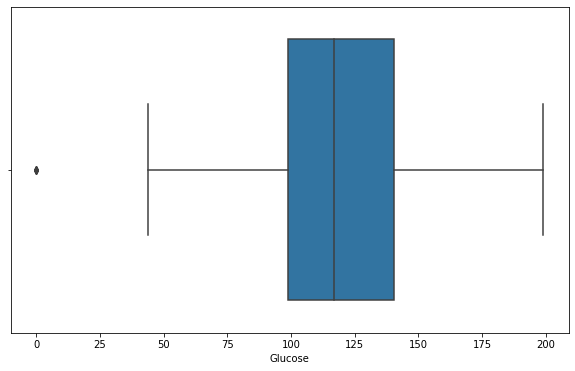

In [6]:
# box plot for Glucose
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(diab.Glucose)
# as the data is normally distributed we can use mean to replace the 0's

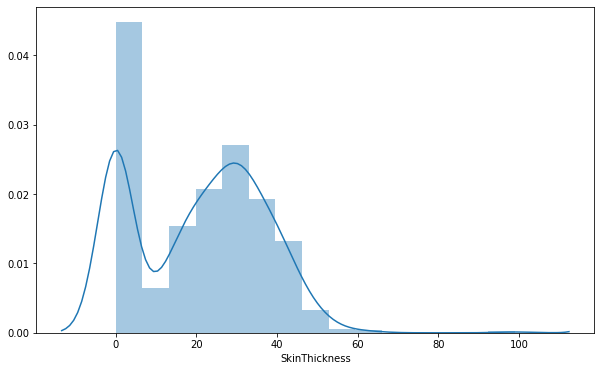

In [7]:
# dist plot for skinThickness
fig,ax = plt.subplots(figsize = (10,6))
sns.distplot(diab.SkinThickness)
# use median/mode to replace the 0's

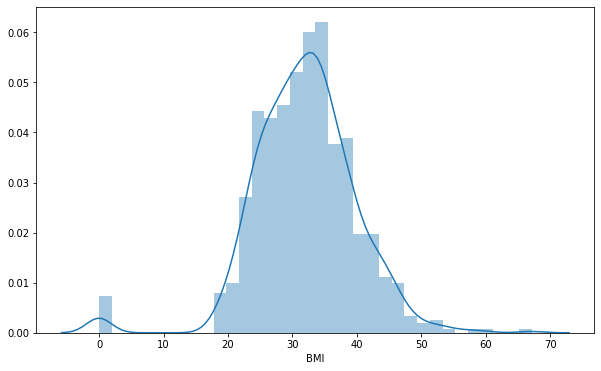

In [8]:
# box plot for BMI
fig,ax = plt.subplots(figsize =(10,6))
sns.distplot(diab.BMI)
# data is skewed, so replace it with median/mode

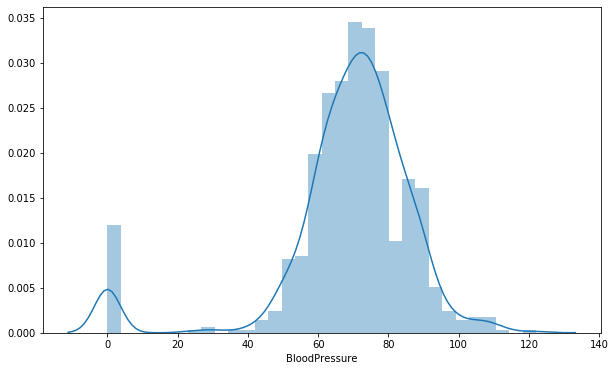

In [9]:
# plot for DiabetesPedigreeFunction 
fig,ax = plt.subplots(figsize = (10,6))
sns.distplot(diab.BloodPressure)
# as the data is skewed, we will use median/mode to replace the 0's

In [10]:
# replacing the 0's with NaN
diab['Glucose'] = diab.Glucose.replace(0, np.NaN)
diab['BloodPressure'] = diab.BloodPressure.replace(0, np.NaN)
diab['BMI'] = diab.BMI.replace(0,np.NaN)
diab['Insulin'] = diab.Insulin.replace(0, np.NaN)
diab['SkinThickness'] = diab.SkinThickness.replace(0, np.NaN)
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [11]:
# replacing the NaN with mean/median 
diab['Glucose']=diab.Glucose.fillna(diab['Glucose'].mean())
diab['Insulin']=diab.Insulin.fillna(diab['Insulin'].mean())
diab['SkinThickness']=diab.SkinThickness.fillna(diab['SkinThickness'].mean())
diab['BloodPressure']=diab.BloodPressure.fillna(diab['BloodPressure'].mean())
diab['BMI']=diab.BMI.fillna(diab['BMI'].mean())
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [12]:
diab = diab.round(2)

In [13]:
# finding the correlation between different factors
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = diab.corr()
top_cor_features = corrmat.index
#plt.figure(figsize = (20,20))
#sns.heatmap(diab[top_cor_features].corr(), annot = True, cmap = 'RdYlGn')

In [14]:
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00,155.55,33.6,0.63,50,1
1,1,85.0,66.0,29.00,155.55,26.6,0.35,31,0
2,8,183.0,64.0,29.15,155.55,23.3,0.67,32,1
3,1,89.0,66.0,23.00,94.00,28.1,0.17,21,0
4,0,137.0,40.0,35.00,168.00,43.1,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180.00,32.9,0.17,63,0
764,2,122.0,70.0,27.00,155.55,36.8,0.34,27,0
765,5,121.0,72.0,23.00,112.00,26.2,0.24,30,0
766,1,126.0,60.0,29.15,155.55,30.1,0.35,47,1


In [15]:
# model building
X = diab.drop(columns = 'Outcome')
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00,155.55,33.6,0.63,50
1,1,85.0,66.0,29.00,155.55,26.6,0.35,31
2,8,183.0,64.0,29.15,155.55,23.3,0.67,32
3,1,89.0,66.0,23.00,94.00,28.1,0.17,21
4,0,137.0,40.0,35.00,168.00,43.1,2.29,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180.00,32.9,0.17,63
764,2,122.0,70.0,27.00,155.55,36.8,0.34,27
765,5,121.0,72.0,23.00,112.00,26.2,0.24,30
766,1,126.0,60.0,29.15,155.55,30.1,0.35,47


In [16]:
y = diab['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [17]:
# splitting the data into Xtrain, ytrain, Xtest, ytest
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [18]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
762,9,89.0,62.0,29.15,155.55,22.50,0.14,33
127,1,118.0,58.0,36.00,94.00,33.30,0.26,23
564,0,91.0,80.0,29.15,155.55,32.40,0.60,27
375,12,140.0,82.0,43.00,325.00,39.20,0.53,58
663,9,145.0,80.0,46.00,130.00,37.90,0.64,40
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180.00,32.90,0.17,63
192,7,159.0,66.0,29.15,155.55,30.40,0.38,36
629,4,94.0,65.0,22.00,155.55,24.70,0.15,21
559,11,85.0,74.0,29.15,155.55,30.10,0.30,35


In [19]:
# algorithms for classification: 
    #1: logistic regression

model1 = LogisticRegression()
model1.fit(X_train, y_train)

C:\Users\deepak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_predict = model1.predict(X_test)

In [21]:
model_socre = model1.score(X_test, y_test)
model_socre

0.78125

In [22]:
print(confusion_matrix(y_test,y_predict))

[[117  13]
 [ 29  33]]


In [23]:
LogRegTest_score = round(model1.score(X_test, y_test)*100,2)
LogRegTest_score

78.12

In [24]:
# random forest
#from sklearn.ensemble import RandomForestClassifier
#RFclassifier = RandomForestClassifier(n_estimators = 20)
#RFclassifier.fit(X_train, y_train)

In [25]:
#RFPredict = RFclassifier.predict(X_test)
#RFPredict

In [26]:
#RFScore = RFclassifier.score(X_test, y_test)
#RFScore

In [32]:
# creating a pickle file 
pickle.dump(model1, open('R_DiabetesPrediction', 'wb'))

In [33]:
pickled_model = pickle.load(open('R_DiabetesPrediction', 'rb'))